In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [3]:
data = pd.read_csv(r'D:\Development\python_projects\py-adult-data-analysis\data\adult.csv')
print(data)

data['workclass'] = data['workclass'].replace('?', 'Unknown')
data['occupation'] = data['occupation'].replace('?', 'Unknown')

data['salary'] = pd.to_numeric(data['salary'], errors='coerce')
data_cleaned = data.dropna(subset=['salary'])

       Unnamed: 0  age         workclass   education      marital-status  \
0               0   39         State-gov   Bachelors       Never-married   
1               1   50  Self-emp-not-inc   Bachelors  Married-civ-spouse   
2               2   38           Private     HS-grad            Divorced   
3               3   53           Private        11th  Married-civ-spouse   
4               4   28           Private   Bachelors  Married-civ-spouse   
...           ...  ...               ...         ...                 ...   
32556       32556   27           Private  Assoc-acdm  Married-civ-spouse   
32557       32557   40           Private     HS-grad  Married-civ-spouse   
32558       32558   58           Private     HS-grad             Widowed   
32559       32559   22           Private     HS-grad       Never-married   
32560       32560   52      Self-emp-inc     HS-grad  Married-civ-spouse   

              occupation   relationship   race     sex  hours-per-week  \
0           A

# Task 1
Print the count of men and women in the dataset.

In [4]:
sex_column = data[['sex']]
sex_counts = sex_column['sex'].value_counts()

print("male:", sex_counts.get("Male"))
print("female:", sex_counts.get("Female"))

male: 21790
female: 10771


# Task 2
Find the average age of men in dataset

In [5]:
mens_age = data[data['sex'] == 'Male']['age']
print("Average age of men:", mens_age.mean().round())

Average age of men: 39.0


# Task 3
Get the percentage of people from Poland (native-country)

In [6]:
total_count = len(data)
poland_count = len(data[data['native-country'] == 'Poland'])
poland_percentage = (poland_count / total_count) * 100

print("Hello Polish people, your percentage is:", poland_percentage)

Hello Polish people, your percentage is: 0.18426952489174164


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [16]:
high_income = data[data['salary'].isin(['>50K', '>=50K'])]
low_income = data[data['salary'].isin(['<50K', '<=50K'])]

print("High income, mean age:", high_income['age'].mean())
print("Standard deviation:", high_income['age'].std())
print("\n")
print("Low income, mean age:", low_income['age'].mean())
print("Standard deviation:", low_income['age'].std())

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              ...\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n             dtype='float64', length=32561)] are in the [columns]"

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [21]:
higher_ed = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]

data.columns = data.columns.str.strip()

non_higher_ed = data[~data['education'].isin(higher_ed)]

high_earners_without_higher_ed = non_higher_ed[non_higher_ed['salary'] == '>50K']

print("Number of people without higher education but earning >50K:", len(high_earners_without_higher_ed))

print("\nSample of these individuals:")
print(high_earners_without_higher_ed[['education', 'salary']].head())

Number of people without higher education but earning >50K: 0

Sample of these individuals:
Empty DataFrame
Columns: [education, salary]
Index: []


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [22]:
print(data.groupby('education')['age'].describe())

                count       mean        std   min    25%   50%   75%   max
education                                                                 
10th            933.0  37.429796  16.720713  17.0  22.00  34.0  52.0  90.0
11th           1175.0  32.355745  15.545485  17.0  18.00  28.0  43.0  90.0
12th            433.0  32.000000  14.334625  17.0  19.00  28.0  41.0  79.0
1st-4th         168.0  46.142857  15.615625  19.0  33.00  46.0  57.0  90.0
5th-6th         333.0  42.885886  15.557285  17.0  29.00  42.0  54.0  84.0
7th-8th         646.0  48.445820  16.092350  17.0  34.25  50.0  61.0  90.0
9th             514.0  41.060311  15.946862  17.0  28.00  39.0  54.0  90.0
Assoc-acdm     1067.0  37.381443  11.095177  19.0  29.00  36.0  44.0  90.0
Assoc-voc      1382.0  38.553546  11.631300  19.0  30.00  37.0  46.0  84.0
Bachelors      5355.0  38.904949  11.912210  19.0  29.00  37.0  46.0  90.0
Doctorate       413.0  47.702179  11.784716  24.0  39.00  47.0  55.0  80.0
HS-grad       10501.0  38

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [26]:
data.columns = data.columns.str.strip()
men = data[data['sex'] == 'Male']

married_men = men[men['marital-status'].str.startswith('Married')]
non_married_men = men[~men['marital-status'].str.startswith('Married')]

married_men_salary = married_men['salary'].value_counts()
non_married_men_salary = non_married_men['salary'].value_counts()

print("Married men salary breakdown:\n", married_men_salary)
print("\nNon-married men salary breakdown:\n", non_married_men_salary)

print("\nProportion of married men earning >50K:", married_men_salary.get('>50K', 0) / len(married_men))
print("Proportion of non-married men earning >50K:", non_married_men_salary.get('>50K', 0) / len(non_married_men))

Married men salary breakdown:
 nan    13541
Name: salary, dtype: int64

Non-married men salary breakdown:
 nan    8249
Name: salary, dtype: int64

Proportion of married men earning >50K: 0.0
Proportion of non-married men earning >50K: 0.0


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [27]:
data.columns = data.columns.str.strip()

max_hours = data['hours-per-week'].max()

people_work_max_hours = data[data['hours-per-week'] == max_hours]

print("Maximum hours per week worked:", max_hours)
print("Number of people working the maximum hours:", len(people_work_max_hours))

Maximum hours per week worked: 99
Number of people working the maximum hours: 85


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

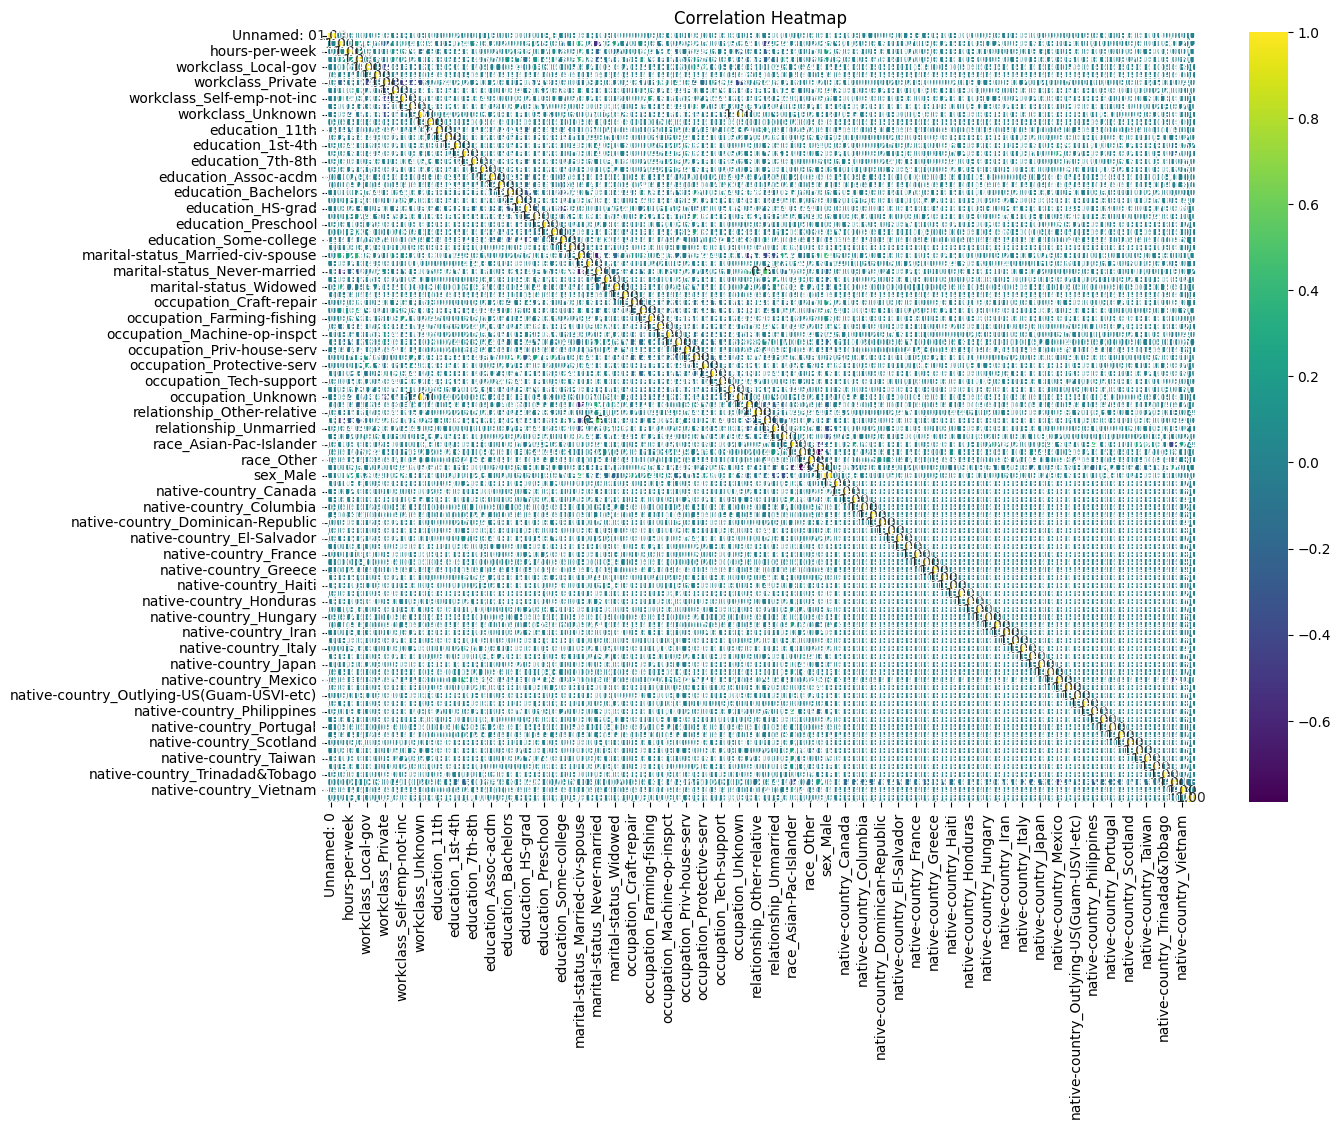

High correlations (greater than 0.5):
                                Unnamed: 0  age  hours-per-week  salary K$  \
Unnamed: 0                             1.0  NaN             NaN        NaN   
age                                    NaN  1.0             NaN        NaN   
hours-per-week                         NaN  NaN             1.0        NaN   
salary K$                              NaN  NaN             NaN        1.0   
workclass_Local-gov                    NaN  NaN             NaN        NaN   
...                                    ...  ...             ...        ...   
native-country_Thailand                NaN  NaN             NaN        NaN   
native-country_Trinadad&Tobago         NaN  NaN             NaN        NaN   
native-country_United-States           NaN  NaN             NaN        NaN   
native-country_Vietnam                 NaN  NaN             NaN        NaN   
native-country_Yugoslavia              NaN  NaN             NaN        NaN   

                         

In [31]:
data.columns = data.columns.str.strip()

data_encoded = pd.get_dummies(data, drop_first=True)

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(14, 10))  # Adjusting the figure size to make the heatmap larger
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

threshold = 0.5
high_correlations = correlation_matrix[correlation_matrix.abs() > threshold]
print("High correlations (greater than 0.5):")
print(high_correlations)